<a href="https://colab.research.google.com/github/Dundalkraven/Binance/blob/main/Binance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='binance-bot-442813')

In [ ]:
# ipython-input-3-6a49cab8841c

from google.cloud import bigquery
import pandas as pd
from google.colab import auth  # Import auth for authentication


# Authenticate user (This is the important step often missed)
auth.authenticate_user()

project_id = 'binance-bot-442813'

client = bigquery.Client(project=project_id)

# Define your SQL query
query = """
SELECT *
FROM `binance-bot-442813.BIG_FIVE.BNB_KPI`
LIMIT 1000
"""

# Execute the query and convert the result to a Pandas DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Display the DataFrame
print(df.head())

  ticker        date     open    close     high      low  Cumulative_Return  \
0    BNB  2023-08-11  240.854  238.897  242.021  238.131           -54.5482   
1    BNB  2023-04-27  331.106  334.210  336.728  328.715           -36.4142   
2    BNB  2022-11-12  289.016  282.491  293.471  271.211           -46.2541   
3    BNB  2023-08-22  211.368  206.728  211.968  203.302           -60.6686   
4    BNB  2024-03-19  553.667  508.852  560.405  497.111            -3.1874   

   Daily_Return  Daily_Volatility  
0       -0.8125            0.8125  
1        0.9375            0.9375  
2       -2.2577            2.2577  
3       -2.1952            2.1952  
4       -8.0942            8.0942  


In [ ]:
df.head()


,ticker,date,open,close,high,low,Cumulative_Return,Daily_Return,Daily_Volatility
0,BNB,2023-08-11,240.854,238.897,242.021,238.131,-54.5482,-0.8125,0.8125
1,BNB,2023-04-27,331.106,334.210,336.728,328.715,-36.4142,0.9375,0.9375
2,BNB,2022-11-12,289.016,282.491,293.471,271.211,-46.2541,-2.2577,2.2577
3,BNB,2023-08-22,211.368,206.728,211.968,203.302,-60.6686,-2.1952,2.1952
4,BNB,2024-03-19,553.667,508.852,560.405,497.111,-3.1874,-8.0942,8.0942


In [ ]:
query = """
SELECT *
FROM `binance-bot-442813.BIG_FIVE.Coins_UNION`

"""
print(df.head())

  ticker        date     open    close     high      low  Cumulative_Return  \
0    BNB  2023-08-11  240.854  238.897  242.021  238.131           -54.5482   
1    BNB  2023-04-27  331.106  334.210  336.728  328.715           -36.4142   
2    BNB  2022-11-12  289.016  282.491  293.471  271.211           -46.2541   
3    BNB  2023-08-22  211.368  206.728  211.968  203.302           -60.6686   
4    BNB  2024-03-19  553.667  508.852  560.405  497.111            -3.1874   

   Daily_Return  Daily_Volatility  
0       -0.8125            0.8125  
1        0.9375            0.9375  
2       -2.2577            2.2577  
3       -2.1952            2.1952  
4       -8.0942            8.0942  


In [ ]:
query_job = client.query(query)
df = query_job.to_dataframe()

# Display the DataFrame
df.head()

,ticker,Date,Open,Close,High,Low,Cumulative_Return,Daily_Return,Daily_Volatility
0,USDT,2023-05-11,1.00100,1.00100,1.00100,1.00090,0.0800,0.0000,0.0000
1,USDT,2024-03-07,1.00050,1.00143,1.00217,1.00016,0.1230,0.0930,0.0930
2,USDT,2023-03-16,1.00419,1.00246,1.00419,1.00109,0.2260,-0.1723,0.1723
3,USDT,2022-11-10,1.01430,1.00440,1.16400,0.98160,0.4199,-0.9760,0.9760
4,USDT,2024-11-13,1.00065,1.00110,1.00252,1.00064,0.0900,0.0450,0.0450


In [ ]:
import pandas as pd
import numpy as np

# Assume 'df' from previous cell is the intended DataFrame
combined_data = df  # Assign 'df' to 'combined_data'

# Verify the actual column names in the DataFrame
print(combined_data.columns)

# Adjust column names in 'columns_to_analyze' to match the DataFrame
columns_to_analyze = ['Open', 'Close', 'High', 'Low',  # Corrected column names
                      'Cumulative_Return', 'Daily_Return', 'Daily_Volatility']

# Calculate mean and standard deviation for the entire dataset
overall_mean = combined_data[columns_to_analyze].mean()
overall_std = combined_data[columns_to_analyze].std()

print("Overall Mean:")
print(overall_mean)
print("\nOverall Standard Deviation:")
print(overall_std)

# Step 3: Calculate statistics per coin (optional)
if 'ticker' in combined_data.columns:
    grouped_stats = combined_data.groupby('ticker')[columns_to_analyze].agg(['mean', 'std'])
    print("\nPer-Coin Statistics:")
    print(grouped_stats)

Index(['ticker', 'Date', 'Open', 'Close', 'High', 'Low', 'Cumulative_Return',
       'Daily_Return', 'Daily_Volatility'],
      dtype='object')
Overall Mean:
Open                 8376.206277
Close                8385.733872
High                 8549.437821
Low                  8205.193109
Cumulative_Return     -28.891421
Daily_Return            0.080187
Daily_Volatility        2.017516
dtype: float64

Overall Standard Deviation:
Open                 17477.337690
Close                17510.954541
High                 17840.197182
Low                  17128.614262
Cumulative_Return       33.356624
Daily_Return             3.386648
Daily_Volatility         2.721154
dtype: float64

Per-Coin Statistics:
                Open                       Close                        High  \
                mean           std          mean           std          mean   
ticker                                                                         
BNB       368.041810    133.866748    368.183199    

In [ ]:
import pandas as pd
import numpy as np

# For example, assume a risk-free rate of 3% per year
risk_free_rate_annual = 0.03
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/252) - 1  # Approx. daily risk-free rate (252 trading days per year)

# Calculate mean return and standard deviation of returns
mean_return = combined_data['Daily_Return'].mean()
std_dev_return = combined_data['Daily_Return'].std()

# Sharpe Ratio calculation
sharpe_ratio = (mean_return - risk_free_rate_daily) / std_dev_return

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.0236426235096595


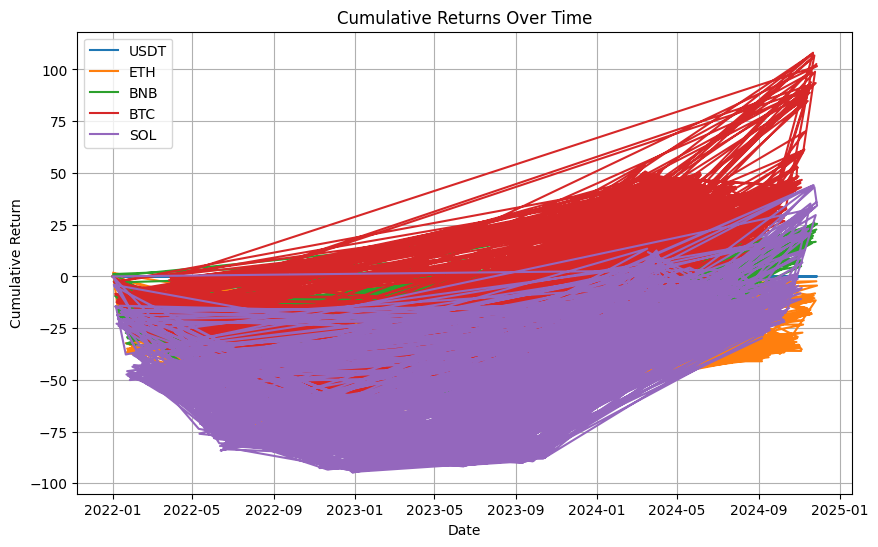

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for ticker in combined_data['ticker'].unique():
    ticker_data = combined_data[combined_data['ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Cumulative_Return'], label=ticker)

plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

In [ ]:
import pandas as pd

# Sort by 'ticker' and 'Date' to ensure correct chronological order
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df = df.sort_values(by=['ticker', 'Date'])

# Calculate the running peak for each coin
df['running_peak'] = df.groupby('ticker')['High'].cummax()

# Calculate the drawdown as the percentage from the peak
df['drawdown'] = (df['running_peak'] - df['High']) / df['running_peak']

# Now, calculate the max drawdown for each coin and save it to a new DataFrame
max_drawdown_df = df.groupby('ticker')['drawdown'].max().reset_index()

# Rename the columns for clarity
df_max= max_drawdown_df.columns = ['ticker', 'max_drawdown']

# Print or display the result DataFrame
print(max_drawdown_df)
max_drawdown_df

In [ ]:
max_drawdown_df

,ticker,max_drawdown
0,BNB,0.612026
1,BTC,0.662234
2,ETH,0.723672
3,SOL,0.943868
4,USDT,0.168543


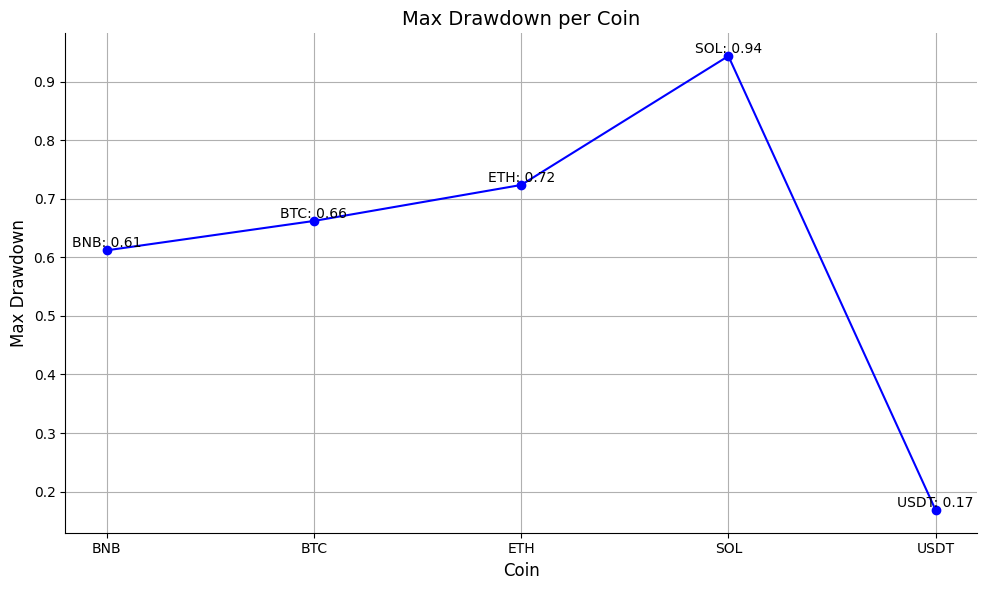

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
ax = plt.gca()


ax.plot(max_drawdown_df['ticker'], max_drawdown_df['max_drawdown'], marker='o', linestyle='-', color='b', label='Max Drawdown')

# Title and labels
plt.title('Max Drawdown per Coin', fontsize=14)
plt.xlabel('Coin', fontsize=12)
plt.ylabel('Max Drawdown', fontsize=12)

# Annotating the points with the ticker names (coins)
for i, row in max_drawdown_df.iterrows():
    ax.text(row['ticker'], row['max_drawdown'], f"{row['ticker']}: {row['max_drawdown']:.2f}",
            ha='center', va='bottom', fontsize=10, color='black')

# Hide top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Example: Assuming 'df' has the columns 'ticker', 'Date', 'Open', 'Close', 'High', 'Low', etc.
# Ensure the 'Date' column is in datetime format and sorted by 'ticker' and 'Date'
combined_data['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['ticker', 'Date'])

# Define the window size for the moving average (e.g., 7-day moving average)
window_size = 7

# Columns to calculate the moving average for
columns_to_average = ['Open', 'Close', 'High', 'Low', 'Cumulative_Return', 'Daily_Return', 'Daily_Volatility']

# Calculate the moving average for each specified column for each coin (ticker)
for column in columns_to_average:
    df[f'{column}_moving_average'] = df.groupby('ticker')[column].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

# Show the result
print(df.head())



     ticker       Date     Open    Close     High      Low  Cumulative_Return  \
5153    BNB 2022-01-01  511.551  525.605  527.406  510.751             0.0000   
1969    BNB 2022-01-02  525.705  531.506  533.907  518.304             1.1227   
2819    BNB 2022-01-03  531.606  512.651  532.800  510.051            -2.4646   
2758    BNB 2022-01-04  512.551  510.049  520.000  502.000            -2.9596   
2578    BNB 2022-01-05  510.049  475.752  515.848  457.354            -9.4849   

      Daily_Return  Daily_Volatility  running_peak  drawdown  \
5153        2.7473            2.7473       527.406  0.000000   
1969        1.1035            1.1035       533.907  0.000000   
2819       -3.5656            3.5656       533.907  0.002073   
2758       -0.4881            0.4881       533.907  0.026048   
2578       -6.7243            6.7243       533.907  0.033824   

      Open_moving_average  Close_moving_average  High_moving_average  \
5153            511.55100             525.60500         

['Open',
 'Close',
 'High',
 'Low',
 'Cumulative_Return',
 'Daily_Return',
 'Daily_Volatility']

In [ ]:
df.head()

,ticker,Date,Open,Close,High,Low,Cumulative_Return,Daily_Return,Daily_Volatility,running_peak,drawdown,Open_moving_average,Close_moving_average,High_moving_average,Low_moving_average,Cumulative_Return_moving_average,Daily_Return_moving_average,Daily_Volatility_moving_average
5153,BNB,2022-01-01,511.551,525.605,527.406,510.751,0.0000,2.7473,2.7473,527.406,0.000000,511.55100,525.60500,527.40600,510.751000,0.000000,2.747300,2.747300
1969,BNB,2022-01-02,525.705,531.506,533.907,518.304,1.1227,1.1035,1.1035,533.907,0.000000,518.62800,528.55550,530.65650,514.527500,0.561350,1.925400,1.925400
2819,BNB,2022-01-03,531.606,512.651,532.800,510.051,-2.4646,-3.5656,3.5656,533.907,0.002073,522.95400,523.25400,531.37100,513.035333,-0.447300,0.095067,2.472133
2758,BNB,2022-01-04,512.551,510.049,520.000,502.000,-2.9596,-0.4881,0.4881,533.907,0.026048,520.35325,519.95275,528.52825,510.276500,-1.075375,-0.050725,1.976125
2578,BNB,2022-01-05,510.049,475.752,515.848,457.354,-9.4849,-6.7243,6.7243,533.907,0.033824,518.29240,511.11260,525.99220,499.692000,-2.757280,-1.385440,2.925760


In [ ]:
table_id = 'binance-bot-442813.BIG_FIVE.Moving_Average'
job = client.load_table_from_dataframe(df, table_id)
job.result()
job.result
print(f"Date successfully exported to {table_id}")

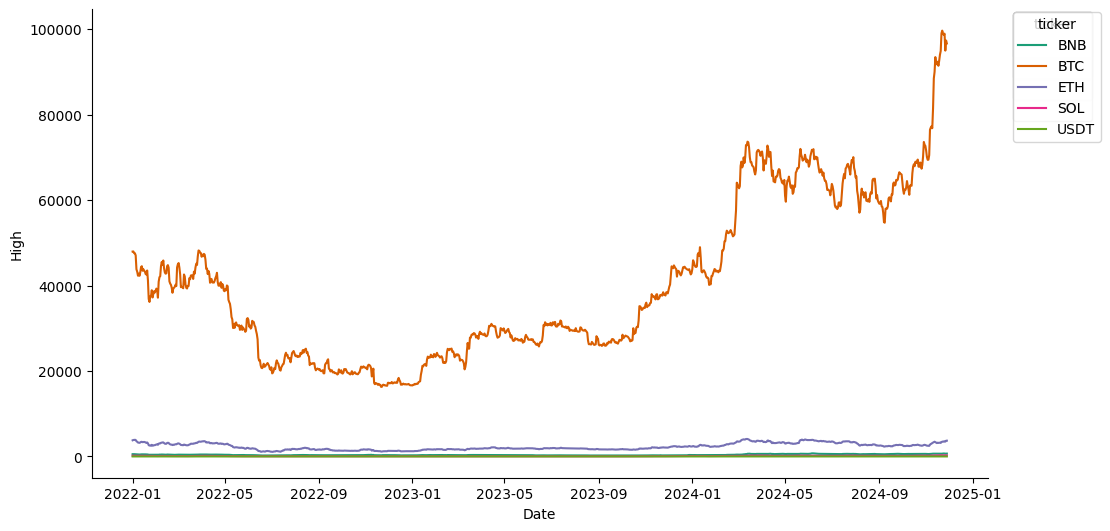

In [ ]:
# @title Date vs High

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ticker')):
  _plot_series(series, series_name, i)
  fig.legend(title='ticker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

In [3]:

from google.cloud import bigquery
client = bigquery.Client()

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import norm


In [5]:
query = """
SELECT
    ticker,
    Date,
    Daily_Return,
    Daily_Volatility
FROM `binance-bot-442813.BIG_FIVE.Coins_UNION`
"""

In [6]:
df = client.query(query).to_dataframe()

RefreshError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7e1f75913f40>)